In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv('Completed_Energy_Projects_Lifecycle_Dataset.csv')

In [7]:
df.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£)
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,1374380,1.29,0.87,High,Gate A,1777836
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,4922878,0.66,0.79,High,Gate B,3228885
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,8894223,0.70,1.02,High,Gate C,6215963
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,11666356,0.72,1.03,High,Gate D,8388798
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,9957041,1.02,1.00,High,Complete,10164952


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Project ID                        2500 non-null   object 
 1   Project Name                      2500 non-null   object 
 2   Location                          2500 non-null   object 
 3   Start Date                        2500 non-null   object 
 4   Stage Date                        2500 non-null   object 
 5   Baseline Duration (days)          2500 non-null   int64  
 6   Baseline Cost (£)                 2500 non-null   int64  
 7   Planned Duration (days)           2500 non-null   int64  
 8   Actual Duration (days)            2500 non-null   int64  
 9   Planned Cost (£)                  2500 non-null   int64  
 10  Actual Cost (£)                   2500 non-null   int64  
 11  Cost Performance Index (CPI)      2500 non-null   float64
 12  Schedu

In [9]:
df.isna().sum()

Project ID                          0
Project Name                        0
Location                            0
Start Date                          0
Stage Date                          0
Baseline Duration (days)            0
Baseline Cost (£)                   0
Planned Duration (days)             0
Actual Duration (days)              0
Planned Cost (£)                    0
Actual Cost (£)                     0
Cost Performance Index (CPI)        0
Schedule Performance Index (SPI)    0
Project Complexity                  0
Project Stage                       0
Earned Value (£)                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['status'] = df.apply(
    lambda row: 'Late' if row['Actual Duration (days)'] > row['Planned Duration (days)'] else 'On Time',
    axis=1
)

In [12]:
df.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£),status
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,1374380,1.29,0.87,High,Gate A,1777836,On Time
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,4922878,0.66,0.79,High,Gate B,3228885,Late
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,8894223,0.70,1.02,High,Gate C,6215963,Late
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,11666356,0.72,1.03,High,Gate D,8388798,On Time
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,9957041,1.02,1.00,High,Complete,10164952,On Time


In [13]:
late_count = (df['status'] == 'Late').sum()
late_count

1174

In [14]:
# what features do I think could be helpful in helping us predict whether a project is going to be late or not? 

# baseline duration - would have to encode this between 0-1
# baseline cost - would have to encode this between 0-1
# planned days - standerdise 0-1
# actual days - standerdise 0-1
# planned cost - standerdise 0-1
# actual cost - standerdise 0-1 
# project complexity - need to encode to low = 0.2 , medium = 0.4 etc 
# stage gate would need to one hot encode
# earned value - need to encode between 0-1

In [15]:
# going to start scaling and encoding my data: 

In [16]:
 '''
 columns_to_scale = [
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Earned Value (£)'
] '''

# MinMaxtransformer = MinMaxScaler().fit(df[columns_to_scale])

# df_normalized = MinMaxtransformer.transform(df[columns_to_scale])

# df_minmax = pd.DataFrame(df_normalized, columns=columns_to_scale)

"\ncolumns_to_scale = [\n   'Baseline Duration (days)', 'Baseline Cost (£)',\n   'Planned Duration (days)', 'Actual Duration (days)',\n   'Planned Cost (£)', 'Earned Value (£)'\n] "

In [17]:
# df_minmax.head()

In [18]:
# Columns to normalize
columns_to_scale = [
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Earned Value (£)', 'Actual Cost (£)'
]

# Apply MinMaxScaler to the selected columns
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(df[columns_to_scale])

# Convert the array into a DataFrame and set appropriate column names
df_normalized = pd.DataFrame(normalized_array, columns=[col + ' (Normalized)' for col in columns_to_scale])

# Reset index to make sure both DataFrames align
df_normalized.index = df.index

# Concatenate the original and normalized DataFrames
df_combined = pd.concat([df, df_normalized], axis=1)

df_combined.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Stage,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,Gate A,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,Gate B,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,Gate C,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,Gate D,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,Complete,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [19]:
# need to sort out the rest of the columns - which are:

# project complexity - need to encode to low = 0.2 , medium = 0.4 etc 
# stage gate - would need to one hot encode

In [20]:
# encoding project complexity and stage gate

# lets check what unique values they have first 

df_combined['Project Complexity'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [21]:
df_combined['Project Stage'].unique()

array(['Gate A', 'Gate B', 'Gate C', 'Gate D', 'Complete'], dtype=object)

In [22]:
priority_mapping = {
    'Low': 0.2,
    'Medium': 0.5,
    'High': 0.8
}

In [23]:
df_combined['Project Complexity'] = df_combined['Project Complexity'].map(priority_mapping)

In [24]:
df_combined.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Stage,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,Gate A,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,Gate B,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,Gate C,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,Gate D,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,Complete,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [25]:
gate_mapping = {
    'Gate A': 0.0,
    'Gate B': 0.25,
    'Gate C': 0.5,
    'Gate D': 0.75,
    'Complete': 1.0
}

In [26]:
df_combined['Project Stage'] = df_combined['Project Stage'].map(gate_mapping)

In [27]:
df_combined.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Stage,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,0.00,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,0.25,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,0.50,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,0.75,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,1.00,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [28]:
df_combined.columns

Index(['Project ID', 'Project Name', 'Location', 'Start Date', 'Stage Date',
       'Baseline Duration (days)', 'Baseline Cost (£)',
       'Planned Duration (days)', 'Actual Duration (days)', 'Planned Cost (£)',
       'Actual Cost (£)', 'Cost Performance Index (CPI)',
       'Schedule Performance Index (SPI)', 'Project Complexity',
       'Project Stage', 'Earned Value (£)', 'status',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)',
       'Actual Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)'],
      dtype='object')

In [29]:
columns_to_drop = [
    'Project ID','Project Name', 'Location', 'Start Date', 'Stage Date',
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Actual Cost (£)', 'Earned Value (£)'
]

df1 = df_combined.drop(columns=columns_to_drop)

In [30]:
df1.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,1.29,0.87,0.8,0.00,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,0.66,0.79,0.8,0.25,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,0.70,1.02,0.8,0.50,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,0.72,1.03,0.8,0.75,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,1.02,1.00,0.8,1.00,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


# Train test split

In [31]:
x = df1.drop('status', axis=1)
y = df1['status']

In [32]:
x.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,1.29,0.87,0.8,0.00,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,0.72,1.03,0.8,0.75,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,1.02,1.00,0.8,1.00,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [33]:
y.head()

0    On Time
1       Late
2       Late
3    On Time
4    On Time
Name: status, dtype: object

In [34]:
x.shape

(2500, 11)

In [35]:
y.shape

(2500,)

In [36]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

# Fitting the model

In [37]:
#Define the model
LogReg = LogisticRegression()

In [38]:
#Fit the training set onto the Logistic Regression model
LogReg.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_val_pred = LogReg.predict(x_val)
y_val_pred

array(['On Time', 'On Time', 'On Time', 'On Time', 'Late', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
       'Late', 'On Time', 'On Time', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'Late', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'Late', 'Late',
       'On Time', 'On Time', 'Late', 'Late', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
       'Late', 'Late', 'On Time', 'On Time', 'On Time', 'Late', 'Late',
       'On Time', 'On Time', 'On Time', 'On Time', 'Late', 'On Time',
       'On Time', 'On Time', 'On Time', 'Late', 'On Time', 'Late',
       'On Time', 'On Time', 'On Time', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'Late', 'Late', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'Late',
       '

In [40]:
# Accuracy

print("Accuracy:", accuracy_score(y_val,y_val_pred))

Accuracy: 0.736


# Confusion Matrix

In [41]:
cm = confusion_matrix(y_val,y_val_pred, labels = LogReg.classes_)
cm

array([[ 97,  81],
       [ 18, 179]], dtype=int64)

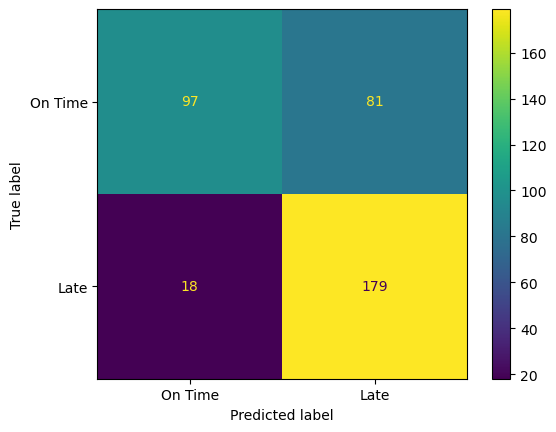

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm
                              , display_labels = ['On Time', 'Late'])
disp.plot()
plt.show()

In [43]:
# Classification Report: 

print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

        Late       0.84      0.54      0.66       178
     On Time       0.69      0.91      0.78       197

    accuracy                           0.74       375
   macro avg       0.77      0.73      0.72       375
weighted avg       0.76      0.74      0.73       375



In [44]:
# need to run the model on the test data and check stats:

# Pickle this Model

In [45]:
import joblib

# joblib.dump(LogReg, 'logreg_model.pkl')

# Build Linear Regression Model 

In [46]:
# now we want to see if we can answer the following business question too:

# when are we expecting the late projects to finish?? 

In [47]:
# I believe I could use a linear regression here, cut up the data, so I just have the late rows

# and build a multivariate linear regression

In [48]:
# I need my Y variable to be days late

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
# what data am I using:

df_combined.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Stage,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,0.00,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,0.25,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,0.50,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,0.75,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,1.00,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [51]:
df_combined.columns

Index(['Project ID', 'Project Name', 'Location', 'Start Date', 'Stage Date',
       'Baseline Duration (days)', 'Baseline Cost (£)',
       'Planned Duration (days)', 'Actual Duration (days)', 'Planned Cost (£)',
       'Actual Cost (£)', 'Cost Performance Index (CPI)',
       'Schedule Performance Index (SPI)', 'Project Complexity',
       'Project Stage', 'Earned Value (£)', 'status',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)',
       'Actual Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)'],
      dtype='object')

In [52]:
df_combined['Days Late'] = (df_combined['Actual Duration (days)'] - df_combined['Planned Duration (days)'])

In [53]:
df_combined.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized),Days Late
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138,-10
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720,12
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815,33
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077,-19
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322,-58


In [54]:
late_df = df_combined[df_combined['status'] == 'Late']
on_time_df = df_combined[df_combined['status'] == 'On Time']

In [55]:
late_df.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized),Days Late
1,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-10-31,596,10164952,238,250,4065980,...,3228885,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720,12
2,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-02-06,596,10164952,357,390,6098971,...,6215963,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815,33
5,PJT0002,Energy Project 2,Liverpool,2020-10-27,2021-02-10,544,2044429,108,113,408885,...,412550,Late,0.624230,0.054439,0.088365,0.093960,0.010442,0.012115,0.012532,5
7,PJT0002,Energy Project 2,Liverpool,2020-10-27,2021-09-12,544,2044429,326,335,1226657,...,950617,Late,0.624230,0.054439,0.409426,0.391946,0.051792,0.037943,0.033894,9
9,PJT0002,Energy Project 2,Liverpool,2020-10-27,2022-04-14,544,2044429,544,588,2044429,...,2044429,Late,0.624230,0.054439,0.730486,0.731544,0.093141,0.090448,0.082166,44


In [56]:
late_df.shape

(1174, 25)

In [57]:
on_time_df.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Earned Value (£),status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized),Days Late
0,PJT0001,Energy Project 1,Bristol,2020-04-18,2020-07-25,596,10164952,119,109,2032990,...,1777836,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138,-10
3,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-05-15,596,10164952,476,457,8131961,...,8388798,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077,-19
4,PJT0001,Energy Project 1,Bristol,2020-04-18,2021-08-21,596,10164952,596,538,10164952,...,10164952,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322,-58
6,PJT0002,Energy Project 2,Liverpool,2020-10-27,2021-05-28,544,2044429,217,208,817771,...,1102881,On Time,0.624230,0.054439,0.248895,0.221477,0.031117,0.045252,0.044929,-9
8,PJT0002,Energy Project 2,Liverpool,2020-10-27,2021-12-28,544,2044429,435,434,1635543,...,1317043,On Time,0.624230,0.054439,0.569956,0.524832,0.072466,0.055532,0.065490,-1


In [58]:
on_time_df.shape

(1326, 25)

In [59]:
late_df.columns

Index(['Project ID', 'Project Name', 'Location', 'Start Date', 'Stage Date',
       'Baseline Duration (days)', 'Baseline Cost (£)',
       'Planned Duration (days)', 'Actual Duration (days)', 'Planned Cost (£)',
       'Actual Cost (£)', 'Cost Performance Index (CPI)',
       'Schedule Performance Index (SPI)', 'Project Complexity',
       'Project Stage', 'Earned Value (£)', 'status',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)',
       'Actual Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)',
       'Days Late'],
      dtype='object')

In [60]:
columns_to_drop = [
    'Project ID','Project Name', 'Location', 'Start Date', 'Stage Date',
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Actual Cost (£)', 'Earned Value (£)', 'status',
]

df2 = late_df.drop(columns=columns_to_drop)

In [61]:
df2.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.088365,0.093960,0.010442,0.012115,0.012532,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.409426,0.391946,0.051792,0.037943,0.033894,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.730486,0.731544,0.093141,0.090448,0.082166,44


In [62]:
# sns.pairplot(df2);

# Train test split

In [63]:
x = df2.drop('Days Late', axis=1)
y = df2['Days Late']

In [64]:
x.shape

(1174, 11)

In [65]:
y.shape

(1174,)

In [66]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [67]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [68]:
y_val_pred = regressor.predict(x_val)
y_val_pred

array([ 3., 21.,  7., 53., 19.,  7., 62., 10.,  9.,  4., 25.,  3., 55.,
       33., 16., 20., 20.,  5.,  5.,  4., 44.,  7., 13.,  5., 14.,  8.,
       10.,  9.,  8., 23., 48.,  4., 51.,  9., 10., 51., 18., 15.,  9.,
        4., 11.,  6., 22., 18., 24., 12., 15.,  1.,  1., 38., 31.,  1.,
        2.,  9.,  6.,  7.,  1.,  8., 37.,  1., 19.,  4., 45.,  5.,  4.,
       21., 26., 24., 26., 15.,  7., 14.,  3., 11., 30.,  9.,  7.,  5.,
        7., 14., 27., 11., 50.,  6.,  4., 29., 11.,  2.,  2.,  1., 22.,
       22., 11.,  8., 22.,  3., 19., 12., 49., 28., 16.,  4., 22.,  1.,
        1., 26.,  1., 31.,  2.,  6., 23., 13.,  3., 36., 15., 22.,  2.,
        7.,  6., 14.,  5., 14., 30., 30.,  6.,  6., 16., 23., 17., 38.,
       15.,  4.,  7., 20., 31., 66., 37., 37.,  4.,  4.,  6.,  3.,  8.,
        4.,  3.,  6., 19.,  2.,  3.,  1., 10., 13., 10., 16.,  3.,  9.,
       17.,  1.,  2., 28.,  3., 18.,  9.,  4., 15., 31., 29., 13., 38.,
        6.,  3., 19., 23., 10., 15., 15.])

In [69]:
# to retrieve the intercept 

print(regressor.intercept_)

-4.99999999999989


In [70]:
# to retrieve the slope (coefficient of x)

print(regressor.coef_)

[-1.29700541e-13 -1.12577819e-13  3.37170999e-13 -1.31317097e-13
 -1.35944489e-14 -7.67955320e-14 -6.79000000e+02  7.45000000e+02
  1.44877314e-15  5.53091968e-13 -5.12348500e-13]


In [71]:
y_pred = regressor.predict(x_test)

In [72]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [73]:
df_pred

,Actual,Predicted
408,11,11.0
2079,14,14.0
1884,41,41.0
1139,7,7.0
865,4,4.0
...,...,...
1823,12,12.0
134,1,1.0
2313,7,7.0
592,25,25.0


In [74]:
from sklearn import metrics

print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 1.0
Mean Absolute Error (MAE): 7.634320043682319e-14
Mean Squared Error (MSE): 8.196799626199005e-27
Root Mean Squared Error (RMSE): 9.053617854868298e-14


# going to drop some columns and re-train a model 

In [75]:
late_df.columns

Index(['Project ID', 'Project Name', 'Location', 'Start Date', 'Stage Date',
       'Baseline Duration (days)', 'Baseline Cost (£)',
       'Planned Duration (days)', 'Actual Duration (days)', 'Planned Cost (£)',
       'Actual Cost (£)', 'Cost Performance Index (CPI)',
       'Schedule Performance Index (SPI)', 'Project Complexity',
       'Project Stage', 'Earned Value (£)', 'status',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)',
       'Actual Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)',
       'Days Late'],
      dtype='object')

In [76]:
columns_to_drop = [
    'Project ID','Project Name', 'Location', 'Start Date', 'Stage Date',
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Actual Cost (£)', 'Earned Value (£)', 'status', 'Planned Duration (days) (Normalized)',
    'Planned Cost (£) (Normalized)', 'Actual Cost (£) (Normalized)'
]

df3 = late_df.drop(columns=columns_to_drop)

In [77]:
df3.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Actual Duration (days) (Normalized),Earned Value (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.277852,0.147303,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.465772,0.290687,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.093960,0.012115,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.391946,0.037943,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.731544,0.090448,44


# Train test split No.2

In [78]:
x = df3.drop('Days Late', axis=1)
y = df3['Days Late']

In [79]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [80]:
regressor2 = LinearRegression()
regressor2.fit(x_train, y_train)

LinearRegression()

In [81]:
y_val_pred = regressor2.predict(x_val)
y_val_pred

array([34.78512305, 41.79600617, 21.70399937, 29.02871759, 14.83265263,
        1.07918796,  9.75137628,  9.35982356,  4.08100278, 30.80926875,
       16.35493937, 22.33821848,  9.13287815, 32.39767875,  1.0650387 ,
       19.85458987, 13.85490088, 10.22412466, 25.95098675,  8.15410368,
       10.92333083, 30.33367429, 29.75940632, 21.7148264 , 14.81206821,
       24.67846716,  8.28220441,  9.78249137,  8.72777648,  1.47064432,
       10.79060668, 31.71361518,  8.28162631,  0.75941145, 28.61613141,
       17.98334512, 14.63783625,  7.35229174,  7.27044565, 11.8242122 ,
        2.642989  , 15.44972699,  8.48911469,  4.30939126, 26.87680021,
        2.40570494,  8.57989702, 12.71572819,  9.93664022, 20.10347796,
       22.46839563, 33.6843743 , 21.75871533,  8.44588838, 26.24901577,
        4.85197585,  5.2423512 , 10.20136307,  7.69019094,  5.82992016,
       16.34477557, 11.56691398, 36.51626471, 25.21858166, 10.78837297,
        2.16942465,  8.39931765,  7.40740749, 24.5775883 ,  6.85

In [82]:
y_val

2214    55
1594    63
1303    33
793     13
1777    14
        ..
2424    37
1233    10
1488     9
1480     1
219     34
Name: Days Late, Length: 176, dtype: int64

In [83]:
# to retrieve the intercept 

print(regressor2.intercept_)

7.892839099613809


In [84]:
# to retrieve the slope (coefficient of x)

print(regressor2.coef_)

[ -1.80211343   1.00587699  -0.23503723 -21.46797948 -18.00793722
   0.40703147  77.82629317  -0.14480626]


In [85]:
y_pred = regressor2.predict(x_test)

In [86]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [87]:
df_pred

,Actual,Predicted
493,4,11.294303
414,11,16.108893
2359,5,27.913977
1704,11,20.449973
1222,16,10.928045
...,...,...
175,1,7.246964
316,7,7.647242
1135,5,5.276404
1502,14,14.345682


In [88]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.5024406033390045
Mean Absolute Error (MAE): 5.944085133574574
Mean Squared Error (MSE): 60.06087773501567
Root Mean Squared Error (RMSE): 7.749895337036215


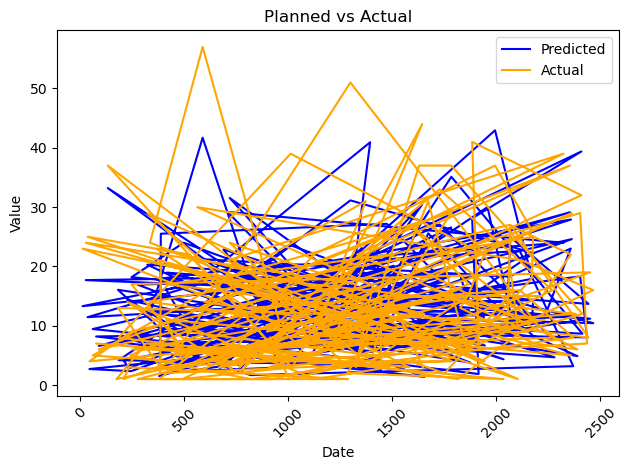

In [89]:
plt.plot(df_pred['Predicted'], label='Predicted', color='blue')
plt.plot(df_pred['Actual'], label='Actual', color='orange')

plt.title("Planned vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
late_df.columns

Index(['Project ID', 'Project Name', 'Location', 'Start Date', 'Stage Date',
       'Baseline Duration (days)', 'Baseline Cost (£)',
       'Planned Duration (days)', 'Actual Duration (days)', 'Planned Cost (£)',
       'Actual Cost (£)', 'Cost Performance Index (CPI)',
       'Schedule Performance Index (SPI)', 'Project Complexity',
       'Project Stage', 'Earned Value (£)', 'status',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)',
       'Actual Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)',
       'Days Late'],
      dtype='object')

In [91]:
columns_to_drop = [
    'Project ID','Project Name', 'Location', 'Start Date', 'Stage Date',
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Actual Cost (£)', 'Earned Value (£)', 'status', 'Earned Value (£) (Normalized)',
    'Actual Cost (£) (Normalized)', 'Actual Duration (days) (Normalized)'
]

df4 = late_df.drop(columns=columns_to_drop)

In [92]:
df4.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.195358,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.298153,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.088365,0.010442,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.409426,0.051792,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.730486,0.093141,44


# Train test and split No.3

In [93]:
x = df4.drop('Days Late', axis=1)
y = df4['Days Late']

In [94]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [95]:
regressor3 = LinearRegression()
regressor3.fit(x_train, y_train)

LinearRegression()

In [96]:
y_val_pred = regressor3.predict(x_val)
y_val_pred

array([18.94152548, 20.84244975, 35.67707021,  6.46480075,  6.35739123,
       26.24756877, 12.48702507, 18.43751532, 17.43347617, 29.19787161,
       30.62888973,  7.82680752, 24.98991716, 21.46727667, 16.4622627 ,
        9.20943279, 16.11846725, 13.83887476, 22.6455773 , 17.69001103,
       11.37987469, 15.39091904,  3.26005996,  3.15689199,  4.55014752,
        5.74799777, 32.16295265,  3.93305939, 14.88766942, 21.49195623,
        6.24155229, 35.63993929,  8.05478146, 12.60910686, 19.18421197,
        6.50655048, 19.09644076,  8.78919804,  5.45650101,  5.77653764,
       11.9941284 , 23.31713689, 35.6035648 , 10.94012226, 23.77174256,
       14.94037515, 22.33394075,  3.05369602,  3.25551097, 12.21922213,
        9.41748665, 11.94691984,  7.96990534,  2.89003734,  9.30525802,
       32.85266295, 20.3138291 , 14.95592308, 20.94983078, 16.40367443,
       30.16252133, 15.38282461,  5.63147474, 10.47108452, 34.22629907,
       25.61762547, 23.7905464 , 28.63803585, 24.47493419, 12.26

In [97]:
y_val

1019    13
219     34
1294    23
491      1
700     11
        ..
397     20
1067    12
2178    22
1354    34
557      3
Name: Days Late, Length: 176, dtype: int64

In [98]:
# to retrieve the intercept 

print(regressor3.intercept_)

5.220959724281824


In [99]:
# to retrieve the slope (coefficient of x)

print(regressor3.coef_)

[-2.11943275 -0.81984303 -0.59849581  1.18360657 -0.73345446  0.04064505
 33.95520728  1.6293003 ]


In [100]:
y_pred = regressor3.predict(x_test)

In [101]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [102]:
df_pred

,Actual,Predicted
2382,12,11.978121
217,4,12.841636
765,3,4.788753
1176,9,6.031580
2101,2,8.309720
...,...,...
897,9,14.774194
2442,10,11.172986
493,4,14.890942
1517,24,17.614392


In [103]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.4719551995113108
Mean Absolute Error (MAE): 6.843506954615994
Mean Squared Error (MSE): 86.05854337741974
Root Mean Squared Error (RMSE): 9.27677440587081


# I am going to take the 3rd lin regression model

In [104]:
# packaging up the model

# joblib.dump(regressor3, 'linreg_model.pkl')

# actually thowing in the unseen data into both models

# log regression

In [105]:
df_unseen = pd.read_csv('In-Progress_Energy_Projects_Dataset.csv')

In [106]:
df_unseen.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£)
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,920578,1.04,1.28,Medium,Gate A,955504
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,1221134,1.26,0.95,High,Gate A,1535900
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,386426,1.09,0.80,Medium,Gate A,421617
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,4436170,1.32,0.67,Medium,Gate C,5868119
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,1219896,1.04,1.08,Low,Gate A,1270503


In [107]:
# Columns to normalize
columns_to_scale = [
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Earned Value (£)', 'Actual Cost (£)'
]

# Apply MinMaxScaler to the selected columns
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(df_unseen[columns_to_scale])

# Convert the array into a DataFrame and set appropriate column names
df_normalized = pd.DataFrame(normalized_array, columns=[col + ' (Normalized)' for col in columns_to_scale])

# Reset index to make sure both DataFrames align
df_normalized.index = df_unseen.index

# Concatenate the original and normalized DataFrames
df_combined2 = pd.concat([df_unseen, df_normalized], axis=1)

df_combined2.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Complexity,Project Stage,Earned Value (£),Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,...,Medium,Gate A,955504,0.425887,0.126387,0.073308,0.070248,0.014615,0.037396,0.040129
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,...,High,Gate A,1535900,0.536534,0.365491,0.092105,0.099174,0.073086,0.078050,0.062710
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,...,Medium,Gate A,421617,0.321503,0.066622,0.054511,0.066116,0.000000,0.000000,0.000000
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,...,Medium,Gate C,5868119,0.640919,0.719938,0.530075,0.566116,0.549202,0.381499,0.304247
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,...,Low,Gate A,1270503,0.732777,0.243398,0.127820,0.140496,0.043229,0.059460,0.062617


In [108]:
df_combined2['Project Complexity'] = df_combined2['Project Complexity'].map(priority_mapping)

In [109]:
df_combined2.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Complexity,Project Stage,Earned Value (£),Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,...,0.5,Gate A,955504,0.425887,0.126387,0.073308,0.070248,0.014615,0.037396,0.040129
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,...,0.8,Gate A,1535900,0.536534,0.365491,0.092105,0.099174,0.073086,0.078050,0.062710
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,...,0.5,Gate A,421617,0.321503,0.066622,0.054511,0.066116,0.000000,0.000000,0.000000
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,...,0.5,Gate C,5868119,0.640919,0.719938,0.530075,0.566116,0.549202,0.381499,0.304247
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,...,0.2,Gate A,1270503,0.732777,0.243398,0.127820,0.140496,0.043229,0.059460,0.062617


In [110]:
df_combined2['Project Stage'] = df_combined2['Project Stage'].map(gate_mapping)

In [111]:
df_combined2.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Complexity,Project Stage,Earned Value (£),Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,...,0.5,0.0,955504,0.425887,0.126387,0.073308,0.070248,0.014615,0.037396,0.040129
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,...,0.8,0.0,1535900,0.536534,0.365491,0.092105,0.099174,0.073086,0.078050,0.062710
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,...,0.5,0.0,421617,0.321503,0.066622,0.054511,0.066116,0.000000,0.000000,0.000000
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,...,0.5,0.5,5868119,0.640919,0.719938,0.530075,0.566116,0.549202,0.381499,0.304247
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,...,0.2,0.0,1270503,0.732777,0.243398,0.127820,0.140496,0.043229,0.059460,0.062617


In [112]:
columns_to_drop = [
    'Project ID','Project Name', 'Location', 'Start Date', 'Stage Date',
    'Baseline Duration (days)', 'Baseline Cost (£)',
    'Planned Duration (days)', 'Actual Duration (days)',
    'Planned Cost (£)', 'Actual Cost (£)', 'Earned Value (£)'
]

df_unseen_normalised = df_combined2.drop(columns=columns_to_drop)

In [113]:
df_unseen_normalised.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,1.04,1.28,0.5,0.0,0.425887,0.126387,0.073308,0.070248,0.014615,0.037396,0.040129
1,1.26,0.95,0.8,0.0,0.536534,0.365491,0.092105,0.099174,0.073086,0.078050,0.062710
2,1.09,0.80,0.5,0.0,0.321503,0.066622,0.054511,0.066116,0.000000,0.000000,0.000000
3,1.32,0.67,0.5,0.5,0.640919,0.719938,0.530075,0.566116,0.549202,0.381499,0.304247
4,1.04,1.08,0.2,0.0,0.732777,0.243398,0.127820,0.140496,0.043229,0.059460,0.062617


In [114]:
df_unseen_normalised.shape

(50, 11)

In [115]:
# Load the model from the file
model = joblib.load('logreg_model.pkl')

# Now you can call predict on new data (X_new)
predictions = model.predict(df_unseen_normalised)

In [116]:
predictions

array(['On Time', 'On Time', 'On Time', 'Late', 'On Time', 'On Time',
       'Late', 'On Time', 'Late', 'Late', 'Late', 'Late', 'Late',
       'On Time', 'Late', 'On Time', 'On Time', 'On Time', 'Late',
       'On Time', 'On Time', 'Late', 'On Time', 'Late', 'Late', 'Late',
       'On Time', 'Late', 'Late', 'Late', 'Late', 'Late', 'On Time',
       'On Time', 'On Time', 'Late', 'Late', 'Late', 'Late', 'Late',
       'Late', 'Late', 'Late', 'Late', 'Late', 'Late', 'Late', 'Late',
       'Late', 'Late'], dtype=object)

In [117]:
# put the predictions back onto the oringinal dataset

In [118]:
df_unseen['Predictions'] = predictions

In [119]:
df_unseen

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£),Predictions
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,920578,1.04,1.28,Medium,Gate A,955504,On Time
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,1221134,1.26,0.95,High,Gate A,1535900,On Time
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,386426,1.09,0.80,Medium,Gate A,421617,On Time
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,4436170,1.32,0.67,Medium,Gate C,5868119,Late
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,1219896,1.04,1.08,Low,Gate A,1270503,On Time
5,PJT0506,Energy Project 506,Bristol,2022-06-14,2022-10-23,679,6721533,135,144,1344306,743406,1.18,0.65,High,Gate A,876081,On Time
6,PJT0507,Energy Project 507,Norwich,2022-05-13,2023-02-06,709,6092022,283,270,2436808,1496453,1.20,0.74,Medium,Gate B,1794339,Late
7,PJT0508,Energy Project 508,Glasgow,2022-05-02,2022-07-08,337,11947696,67,66,2389539,2553240,1.21,1.29,Medium,Gate A,3083531,On Time
8,PJT0509,Energy Project 509,Liverpool,2022-04-11,2023-12-02,730,8117704,584,527,6494163,5246431,0.97,0.78,Low,Gate D,5088597,Late
9,PJT0510,Energy Project 510,London,2022-06-06,2023-07-09,536,11459878,428,434,9167902,6784904,1.30,0.96,High,Gate D,8790351,Late


In [120]:
df_unseen_normalised.to_csv('in_progress_test.csv', index=False)

# now using the linear Regression to predict and add to the in progress dataset 

In [121]:
df4.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.195358,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.298153,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.088365,0.010442,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.409426,0.051792,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.730486,0.093141,44


In [122]:
df_unseen.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£),Predictions
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,920578,1.04,1.28,Medium,Gate A,955504,On Time
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,1221134,1.26,0.95,High,Gate A,1535900,On Time
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,386426,1.09,0.80,Medium,Gate A,421617,On Time
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,4436170,1.32,0.67,Medium,Gate C,5868119,Late
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,1219896,1.04,1.08,Low,Gate A,1270503,On Time


In [123]:
# need to match the column headers to be used within the linear regression model 

In [124]:
# columns used in df4

# Cost Performance Index (CPI), Schedule Performance Index (SPI), Project Complexity, 
# Project Stage, Baseline Duration (days) (Normalized), Baseline Cost (£) (Normalized), 
# 'Planned Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)' 

In [125]:
df_combined2.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),...,Project Complexity,Project Stage,Earned Value (£),Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,...,0.5,0.0,955504,0.425887,0.126387,0.073308,0.070248,0.014615,0.037396,0.040129
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,...,0.8,0.0,1535900,0.536534,0.365491,0.092105,0.099174,0.073086,0.078050,0.062710
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,...,0.5,0.0,421617,0.321503,0.066622,0.054511,0.066116,0.000000,0.000000,0.000000
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,...,0.5,0.5,5868119,0.640919,0.719938,0.530075,0.566116,0.549202,0.381499,0.304247
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,...,0.2,0.0,1270503,0.732777,0.243398,0.127820,0.140496,0.043229,0.059460,0.062617


In [126]:
# List of columns you want to keep
columns_to_keep = ['Cost Performance Index (CPI)', 'Schedule Performance Index (SPI)', 'Project Complexity',
                   'Project Stage', 'Baseline Duration (days) (Normalized)','Baseline Cost (£) (Normalized)', 'Planned Duration (days) (Normalized)',
                   'Planned Cost (£) (Normalized)']

# Select only these columns from the DataFrame
df_filtered = df_combined2[columns_to_keep]

In [127]:
df_filtered.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized)
0,1.04,1.28,0.5,0.0,0.425887,0.126387,0.073308,0.014615
1,1.26,0.95,0.8,0.0,0.536534,0.365491,0.092105,0.073086
2,1.09,0.80,0.5,0.0,0.321503,0.066622,0.054511,0.000000
3,1.32,0.67,0.5,0.5,0.640919,0.719938,0.530075,0.549202
4,1.04,1.08,0.2,0.0,0.732777,0.243398,0.127820,0.043229


# LinReg

In [128]:
# Load the model from the file
model = joblib.load('linreg_model.pkl')

# Now you can call predict on new data (X_new)
predictions2 = model.predict(df_filtered)

In [129]:
predictions2

array([ 3.69336703,  4.28366161,  3.52706661, 21.35090579,  5.42538943,
        6.70673303, 16.65612254,  2.08842683, 38.55469414, 27.63000155,
       10.18926673, 18.18217314, 25.85200867,  2.37813752,  5.17088304,
        6.49628746,  6.57357631,  6.0823389 , 10.13638748,  7.71174129,
        6.10190823, 12.42716615,  5.90791018, 18.16929238, 10.64363808,
       15.83754146,  4.95268685, 25.21972203, 28.0592999 , 19.26541874,
       12.86791733, 33.93712136, 11.79257188,  6.21658128,  4.19772833,
       14.80238452, 20.75347205, 33.74490499, 17.31462065, 33.13840234,
        9.92600608, 20.85455507, 12.80885222, 27.50987774,  5.12835794,
       27.93167801, 11.87640036, 14.54775107, 20.33649528, 22.1727884 ])

In [130]:
df_unseen['Predictions Days Late'] = predictions

In [131]:
df_unseen.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£),Predictions,Predictions Days Late
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,920578,1.04,1.28,Medium,Gate A,955504,On Time,On Time
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,1221134,1.26,0.95,High,Gate A,1535900,On Time,On Time
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,386426,1.09,0.80,Medium,Gate A,421617,On Time,On Time
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,4436170,1.32,0.67,Medium,Gate C,5868119,Late,Late
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,1219896,1.04,1.08,Low,Gate A,1270503,On Time,On Time


In [132]:
df_unseen.loc[df_unseen['Predictions'] == 'On Time', 'Predictions Days Late'] = 0

In [133]:
df_unseen.drop(columns = 'Predictiosn Days Late', inplace = True)

KeyError: "['Predictiosn Days Late'] not found in axis"

In [134]:
df_unseen.head()

,Project ID,Project Name,Location,Start Date,Stage Date,Baseline Duration (days),Baseline Cost (£),Planned Duration (days),Actual Duration (days),Planned Cost (£),Actual Cost (£),Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Earned Value (£),Predictions,Predictions Days Late
0,PJT0501,Energy Project 501,Bristol,2022-07-12,2022-10-05,455,3723487,91,84,744697,920578,1.04,1.28,Medium,Gate A,955504,On Time,0
1,PJT0502,Energy Project 502,Bristol,2022-03-07,2022-06-22,508,8115424,101,98,1623084,1221134,1.26,0.95,High,Gate A,1535900,On Time,0
2,PJT0503,Energy Project 503,Liverpool,2022-02-09,2022-04-30,405,2625703,81,82,525140,386426,1.09,0.80,Medium,Gate A,421617,On Time,0
3,PJT0504,Energy Project 504,Liverpool,2022-06-28,2023-06-16,558,14626012,334,324,8775607,4436170,1.32,0.67,Medium,Gate C,5868119,Late,Late
4,PJT0505,Energy Project 505,Liverpool,2022-09-15,2023-01-13,602,5872782,120,118,1174556,1219896,1.04,1.08,Low,Gate A,1270503,On Time,0


# save to a CSV

In [ ]:
df_unseen.to_csv('in_progress_predictions.csv', index=False)

# going to try and improve my linear regression

In [135]:
# what data set am I going to use: 

df4.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.195358,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.298153,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.088365,0.010442,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.409426,0.051792,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.730486,0.093141,44


In [136]:
# to retrieve the slope (coefficient of x)

print(regressor3.coef_)

[-2.11943275 -0.81984303 -0.59849581  1.18360657 -0.73345446  0.04064505
 33.95520728  1.6293003 ]


In [138]:
coeff_df = pd.DataFrame(regressor3.coef_, x_train.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Cost Performance Index (CPI),-2.119433
Schedule Performance Index (SPI),-0.819843
Project Complexity,-0.598496
Project Stage,1.183607
Baseline Duration (days) (Normalized),-0.733454
Baseline Cost (£) (Normalized),0.040645
Planned Duration (days) (Normalized),33.955207
Planned Cost (£) (Normalized),1.629300


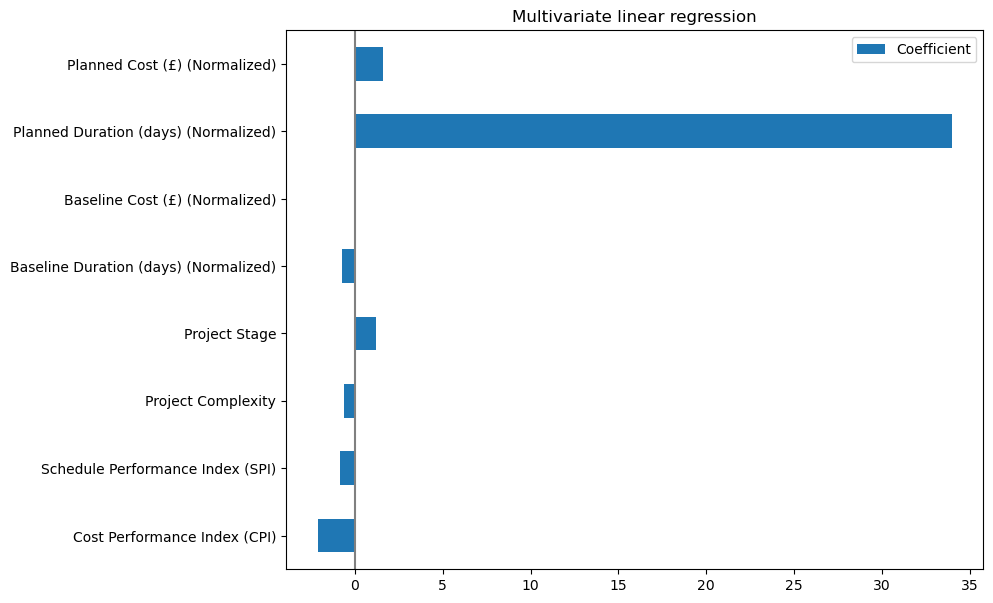

In [139]:
coeff_df.plot(kind = 'barh', figsize = (9,7))
plt.title('Multivariate linear regression')
plt.axvline(x=0, color = '.5')

In [140]:
# drop Baseline Cost normalised, baseline duration normalised, project complexity, SPI 

In [141]:
df4.columns

Index(['Cost Performance Index (CPI)', 'Schedule Performance Index (SPI)',
       'Project Complexity', 'Project Stage',
       'Baseline Duration (days) (Normalized)',
       'Baseline Cost (£) (Normalized)',
       'Planned Duration (days) (Normalized)', 'Planned Cost (£) (Normalized)',
       'Days Late'],
      dtype='object')

In [142]:
columns_to_drop = [
    'Baseline Cost (£) (Normalized)', 'Baseline Duration (days) (Normalized)',
]

df5 = df4.drop(columns=columns_to_drop)

In [143]:
columns_to_drop = [
    'Project Complexity', 'Schedule Performance Index (SPI)'
]

df5 = df5.drop(columns=columns_to_drop)

In [144]:
df5.head()

,Cost Performance Index (CPI),Project Stage,Planned Duration (days) (Normalized),Planned Cost (£) (Normalized),Days Late
1,0.66,0.25,0.279823,0.195358,12
2,0.70,0.50,0.455081,0.298153,33
5,0.89,0.00,0.088365,0.010442,5
7,0.94,0.50,0.409426,0.051792,9
9,0.91,1.00,0.730486,0.093141,44


# linear Regression 4

In [145]:
x = df5.drop('Days Late', axis=1)
y = df5['Days Late']

In [146]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [147]:
regressor4 = LinearRegression()
regressor4.fit(x_train, y_train)

LinearRegression()

In [148]:
y_val_pred = regressor4.predict(x_val)
y_val_pred

array([15.21043941, 11.17704679,  5.99018656, 12.1170697 ,  2.7235124 ,
        7.98780144, 14.51559259, 11.76744607, 23.6525375 , 16.85467282,
        6.58522261,  8.52267644, 19.53795856, 25.57947565, 18.18582519,
       35.76997858,  3.7536466 ,  3.54399262, 13.14440492, 17.15491997,
        5.06132136, 19.54590711, 14.88452386, 22.37964371,  9.99128027,
       21.55894788, 12.26388987, 26.28619272, 15.4299215 , 11.81286969,
        3.3446783 , 27.14118384, 17.80626538,  4.92929917, 15.20257448,
       29.55476916, 18.10065065,  7.48123165, 28.89687066, 12.5016956 ,
       10.15345719, 17.15728653, 21.32053847, 19.40548969, 35.49378083,
        2.15382648,  7.70407171, 19.71400496, 34.55096076, 10.95304669,
        7.4410974 , 32.6044522 ,  7.87978969, 24.57812102,  7.05833048,
       10.72974019,  4.90705142,  4.59908809,  5.87863799,  9.02622475,
       18.71594123,  4.027285  , 34.81812782,  6.67126931,  8.80635403,
       17.72339746, 22.07699894,  4.8286053 ,  4.49608882,  8.51

In [149]:
y_val

2143     8
1752    17
200      4
2241    10
2425     2
        ..
1439    28
1058     4
627     16
101      3
1355     9
Name: Days Late, Length: 176, dtype: int64

In [150]:
# to retrieve the intercept 

print(regressor4.intercept_)

2.251934922911703


In [151]:
# to retrieve the slope (coefficient of x)

print(regressor3.coef_)

[-2.11943275 -0.81984303 -0.59849581  1.18360657 -0.73345446  0.04064505
 33.95520728  1.6293003 ]


In [152]:
y_pred = regressor4.predict(x_test)

In [153]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
1658,42,27.400394
1553,36,20.508052
120,2,1.910631
2424,37,21.158118
984,14,16.233650


In [154]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.44953021768377766
Mean Absolute Error (MAE): 7.947692984731046
Mean Squared Error (MSE): 109.62123665018194
Root Mean Squared Error (RMSE): 10.470016076882688


# stage gate linear regressions

In [156]:
# I am going to split the data up into the stage gates and build a lin reg for each 

# so that these models can be used for projects that are different stage gates

# splitting up data into stage gates

In [157]:
df4.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized),Days Late
1,0.66,0.79,0.8,0.25,0.731006,0.482565,0.279823,0.195358,12
2,0.70,1.02,0.8,0.50,0.731006,0.482565,0.455081,0.298153,33
5,0.89,1.01,0.2,0.00,0.624230,0.054439,0.088365,0.010442,5
7,0.94,0.77,0.2,0.50,0.624230,0.054439,0.409426,0.051792,9
9,0.91,1.00,0.2,1.00,0.624230,0.054439,0.730486,0.093141,44


In [158]:
a_gate_df = df4[df4['Project Stage'] == 0.0]
b_gate_df = df4[df4['Project Stage'] == 0.25]
c_gate_df = df4[df4['Project Stage'] == 0.50]
d_gate_df = df4[df4['Project Stage'] == 0.75]
complete_gate_df = df4[df4['Project Stage'] == 1]

# stage gate A model

In [159]:
x = a_gate_df.drop('Days Late', axis=1)
y = a_gate_df['Days Late']

In [160]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [161]:
regressorA = LinearRegression()
regressorA.fit(x_train, y_train)

LinearRegression()

In [162]:
y_val_pred = regressorA.predict(x_val)
y_val_pred

array([4.81813593, 3.60174615, 4.04739351, 2.63991043, 3.40327638,
       5.93327399, 6.26491576, 4.42054479, 5.68015604, 2.9248056 ,
       6.37136939, 3.64079108, 3.46876625, 3.88395764, 4.28127797,
       3.6256753 , 3.35499725, 4.73327068, 3.41741443, 6.64482074,
       5.41312994, 7.69223432, 3.70584446, 4.85227954, 2.45149523,
       3.05018616, 4.79848393, 4.63795593, 2.96809435, 5.63029033,
       5.41764369, 6.89469346, 4.17521425, 6.57528349])

In [163]:
y_val

280     11
655      1
1210     1
1945     4
1340     5
2320     6
1825     7
2345     1
605      6
315      5
940      9
2390     6
1865     2
1430     3
895      6
745      3
395      7
385      2
1715     5
2200     4
2095     5
1990    11
175      1
200      4
1080     4
2075     4
2100     7
1570     3
925      1
715      1
955     11
390      8
780      2
1615     4
Name: Days Late, dtype: int64

In [164]:
# to retrieve the intercept 

print(regressorA.intercept_)

4.550522511415495


In [165]:
# to retrieve the slope (coefficient of x)

print(regressorA.coef_)

[-1.69332134e-01 -8.94156934e-01 -1.63223618e+00  4.31184657e-04
 -2.61089149e+01  4.20657633e+06  2.08107075e+02 -2.19304965e+07]


In [166]:
y_pred = regressorA.predict(x_test)

In [167]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
1010,12,7.555995
2330,7,4.754472
120,2,1.696505
360,5,3.237342
1075,6,4.363168


In [168]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.31448449000634193
Mean Absolute Error (MAE): 1.922142344000469
Mean Squared Error (MSE): 5.382719969041899
Root Mean Squared Error (RMSE): 2.3200689578204132


# stage gate B

In [169]:
x = b_gate_df.drop('Days Late', axis=1)
y = b_gate_df['Days Late']

In [170]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [171]:
regressorB = LinearRegression()
regressorB.fit(x_train, y_train)

LinearRegression()

In [172]:
y_val_pred = regressorB.predict(x_val)
y_val_pred

array([ 7.38917848,  8.50762703, 13.41320633, 15.78480345,  5.39325142,
       13.33474496, 11.37990407, 11.96310542,  8.22816415, 12.39336587,
       10.73846841,  7.69627841,  8.6458615 ,  7.9277444 ,  8.25788574,
        9.69663278, 10.35629542,  6.2034071 ,  8.24523127,  5.77219497,
        9.68451403,  4.14838263, 13.86738576, 13.29009988, 12.81754049,
        8.5732202 , 14.291818  , 14.89734405,  9.07639555,  4.45204226,
        7.4296382 ,  6.42433538])

In [173]:
y_val

1571    15
2196     2
2316     6
1011    20
2436     7
2451    19
1471    11
1936    18
2376     8
1786     4
2221    15
1716     3
1701    16
1406     9
1086    14
1461     3
2156     9
1336     2
1036     6
731      1
1901    10
1476     2
701     13
16       4
1451    21
1606     9
831     14
291     15
2261    17
1791     1
2286     4
441      1
Name: Days Late, dtype: int64

In [174]:
# to retrieve the intercept 

print(regressorB.intercept_)

-50162.73384138841


In [175]:
# to retrieve the slope (coefficient of x)

print(regressorB.coef_)

[ 4.00994709e-01  6.38263750e-01 -8.21666801e-01  1.79582275e-06
 -1.22825525e+02 -1.87955849e+06  4.68367151e+02  4.89942916e+06]


In [176]:
y_pred = regressorB.predict(x_test)

In [177]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
1796,4,6.160496
2171,18,11.586083
2231,11,12.116102
741,6,4.081163
1971,15,7.795761


In [178]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.19078248854528002
Mean Absolute Error (MAE): 4.509997016546109
Mean Squared Error (MSE): 30.332652725052043
Root Mean Squared Error (RMSE): 5.507508758508882


# stage gate c

In [179]:
x = c_gate_df.drop('Days Late', axis=1)
y = c_gate_df['Days Late']

In [180]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [181]:
regressorC = LinearRegression()
regressorC.fit(x_train, y_train)

LinearRegression()

In [182]:
y_val_pred = regressorC.predict(x_val)
y_val_pred

array([ 8.1562813 , 10.97426186, 17.31644358, 19.33153828, 19.37059506,
       16.27945399, 10.77173517, 18.50924816, 18.58245489, 20.27316954,
        9.10767459,  9.51307052,  8.94010318, 17.80948202,  7.54409259,
       19.25691308, 18.15545795, 11.6685111 , 17.01386255, 12.49064787,
       11.43482149, 10.26372552,  8.84050679, 18.64528586, 20.94847263,
       12.318204  , 10.5537537 , 17.41573726, 19.28594923, 13.79668494,
       14.21822294, 14.92022799, 11.41421735,  9.81494766, 17.33377109,
       20.78218877])

In [183]:
y_val

1052    11
852      5
1827    13
792     25
2147     7
1907    28
2292    21
2257    33
1942    31
1267     6
1027    10
2142    11
1822    15
2067    30
1797     5
827     11
247     17
1137    13
1397     4
922     22
2152     8
2137     6
1207     5
907      3
22      10
2177    25
847     11
1757    24
807     28
452     18
642      4
1257    16
2382    12
1247    10
107      5
2472     7
Name: Days Late, dtype: int64

In [184]:
# to retrieve the intercept 

print(regressorC.intercept_)

104097.55004120614


In [185]:
# to retrieve the slope (coefficient of x)

print(regressorC.coef_)

[-3.80133225e+00  2.63827563e+00 -2.09703654e+00 -2.35235319e-04
  1.72328854e+03  2.91103705e+06 -3.97324086e+03 -5.05878494e+06]


In [186]:
y_pred = regressorC.predict(x_test)

In [187]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
1782,28,20.202699
67,16,13.638321
497,1,15.007386
1892,6,14.983309
1557,14,5.148477


In [188]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.044823998330535963
Mean Absolute Error (MAE): 7.868954687380874
Mean Squared Error (MSE): 87.84409712358571
Root Mean Squared Error (RMSE): 9.372518184756203


# stage gate D

In [189]:
x = d_gate_df.drop('Days Late', axis=1)
y = d_gate_df['Days Late']

In [190]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [191]:
regressorD = LinearRegression()
regressorD.fit(x_train, y_train)

LinearRegression()

In [192]:
y_val_pred = regressorD.predict(x_val)
y_val_pred

array([15.74078413, 13.48392512,  9.97891805, 18.40381979,  9.322018  ,
       15.48519065, 17.72061899, 18.29441206, 22.21109544, 15.24907535,
       30.53033302, 25.29818212, 21.33131935, 17.46719565, 18.55145357,
       14.04054819, 12.98559638, 12.67442734, 30.3022438 , 12.57400156,
       17.3858305 , 14.25229839, 18.99290697, 25.77696973, 27.37008528,
       27.78931173, 19.23566612, 26.17302995, 28.42466568, 24.57064837,
       21.69122898, 24.49178658, 21.87437536, 22.84588048, 11.14141425,
       27.37833667, 12.97002067])

In [193]:
y_val

1408    17
468      8
1208    15
2103    17
2053    10
1698    23
1863    15
68       4
1643    15
2143     8
1493    35
1658    42
888      5
2178    22
1463    28
1743    27
1128     1
1588    20
1393    23
938     23
563     30
1838    16
1028    17
1423     8
38       4
1678    17
1068    35
943     50
2203    23
1543    50
273     29
1188    55
1858    12
528     19
813      5
933     24
623      4
Name: Days Late, dtype: int64

In [194]:
# to retrieve the intercept 

print(regressorD.intercept_)

-740017.852022932


In [195]:
# to retrieve the slope (coefficient of x)

print(regressorD.coef_)

[ 8.74446582e-01 -1.93604311e+00 -2.14677620e+00 -8.88431445e-04
 -2.67453989e+02 -1.84935982e+07  4.98305871e+02  2.41035676e+07]


In [196]:
y_pred = regressorD.predict(x_test)

In [197]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
748,25,16.821831
1828,5,26.317630
133,37,27.061562
588,6,28.631092
2473,52,26.016886


In [198]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.07085493925578967
Mean Absolute Error (MAE): 10.043112131255361
Mean Squared Error (MSE): 157.59947468002628
Root Mean Squared Error (RMSE): 12.55386293855506


# stage gate complete

In [199]:
x = complete_gate_df.drop('Days Late', axis=1)
y = complete_gate_df['Days Late']

In [200]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [201]:
regressorCOM = LinearRegression()
regressorCOM.fit(x_train, y_train)

LinearRegression()

In [202]:
y_val_pred = regressorCOM.predict(x_val)
y_val_pred

array([14.3515625 , 13.23242188, 19.34179688, 37.75      , 22.44335938,
       36.93359375, 19.79492188, 16.984375  , 21.5703125 , 41.50976562,
       19.83398438, 20.50976562, 11.80664062, 20.53515625, 20.8359375 ,
       18.41796875, 31.97265625, 15.93554688, 18.46875   , 18.796875  ,
       17.70703125, 31.58789062, 29.140625  , 20.78710938, 26.1328125 ,
       39.04492188, 26.5234375 , 11.78320312, 34.81835938, 11.13085938,
       36.96679688, 31.97460938, 16.94140625, 29.34179688, 24.76367188,
       14.53320312, 23.3671875 ])

In [203]:
y_val

759      1
484     22
414     11
2499    14
634     38
24      53
2289    17
559     21
1839    20
134      1
2104     1
669      3
1669    19
1119    31
2484    38
354     30
1674    43
2249    27
474     21
349     19
1744    23
719     24
1069    29
2424    37
1124    25
2274    31
1034     9
2129    22
909     33
1559     4
2029    49
1969     6
1324    17
29      11
689      7
1314    16
2394    26
Name: Days Late, dtype: int64

In [204]:
# to retrieve the intercept 

print(regressorCOM.intercept_)

10219551382971.787


In [205]:
# to retrieve the slope (coefficient of x)

print(regressorCOM.coef_)

[-3.58446130e+00 -7.51426704e+11  2.32978587e+00  1.00422573e+12
  6.99861824e+13 -4.01148208e+14 -9.75782707e+13  4.18267946e+14]


In [206]:
y_pred = regressorCOM.predict(x_test)

In [207]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head()

,Actual,Predicted
2054,26,16.574219
469,11,22.298828
1484,23,9.771484
169,66,42.082031
679,27,25.423828


In [208]:
print('R-Squared:', metrics.r2_score(y_test, y_pred))

# this is how effective our prediction model is. Goes from 0% to 100%


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# this is just the average of the errors


print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# this tells us how close a regression line is to a set of points 
# it does this by taking the distances from the points to the regression line (these are the distances of the 'errors')
# the squaring is necassary to remove any negative signs 
# the lower the MSE the better the forecast 
# this number is also punished greatly by outliers as their value is squared 


print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# RMSE gives the amount of error in the same units as the dependent variable (y-axis)

R-Squared: 0.2638614303702388
Mean Absolute Error (MAE): 10.837468327702704
Mean Squared Error (MSE): 159.29845067617055
Root Mean Squared Error (RMSE): 12.62134900381772


# pickling up these models

In [211]:
joblib.dump(regressorA, 'linreg_model_A.pkl')

['linreg_model_A.pkl']

In [212]:
joblib.dump(regressorB, 'linreg_model_B.pkl')

['linreg_model_B.pkl']

In [213]:
joblib.dump(regressorC, 'linreg_model_C.pkl')

['linreg_model_C.pkl']

In [214]:
joblib.dump(regressorD, 'linreg_model_D.pkl')

['linreg_model_D.pkl']

In [215]:
joblib.dump(regressorCOM, 'linreg_model_COM.pkl')

['linreg_model_COM.pkl']

In [216]:
# having issues with columns matching for the lin reg and logistic reg 

# so building new log reg to match the columns for the most recent lin reg 

In [218]:
df1.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized),Earned Value (£) (Normalized),Actual Cost (£) (Normalized)
0,1.29,0.87,0.8,0.00,On Time,0.731006,0.482565,0.104566,0.088591,0.092563,0.077651,0.048138
1,0.66,0.79,0.8,0.25,Late,0.731006,0.482565,0.279823,0.277852,0.195358,0.147303,0.186720
2,0.70,1.02,0.8,0.50,Late,0.731006,0.482565,0.455081,0.465772,0.298153,0.290687,0.341815
3,0.72,1.03,0.8,0.75,On Time,0.731006,0.482565,0.630339,0.555705,0.400948,0.394986,0.450077
4,1.02,1.00,0.8,1.00,On Time,0.731006,0.482565,0.807069,0.664430,0.503743,0.480244,0.383322


In [219]:
columns_to_drop = [
    'Earned Value (£) (Normalized)', 'Actual Cost (£) (Normalized)'
]

df6 = df1.drop(columns=columns_to_drop)

In [220]:
df6.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Actual Duration (days) (Normalized),Planned Cost (£) (Normalized)
0,1.29,0.87,0.8,0.00,On Time,0.731006,0.482565,0.104566,0.088591,0.092563
1,0.66,0.79,0.8,0.25,Late,0.731006,0.482565,0.279823,0.277852,0.195358
2,0.70,1.02,0.8,0.50,Late,0.731006,0.482565,0.455081,0.465772,0.298153
3,0.72,1.03,0.8,0.75,On Time,0.731006,0.482565,0.630339,0.555705,0.400948
4,1.02,1.00,0.8,1.00,On Time,0.731006,0.482565,0.807069,0.664430,0.503743


In [221]:
columns_to_drop = [
    'Actual Duration (days) (Normalized)'
]

df6 = df6.drop(columns=columns_to_drop)

In [222]:
df6.head()

,Cost Performance Index (CPI),Schedule Performance Index (SPI),Project Complexity,Project Stage,status,Baseline Duration (days) (Normalized),Baseline Cost (£) (Normalized),Planned Duration (days) (Normalized),Planned Cost (£) (Normalized)
0,1.29,0.87,0.8,0.00,On Time,0.731006,0.482565,0.104566,0.092563
1,0.66,0.79,0.8,0.25,Late,0.731006,0.482565,0.279823,0.195358
2,0.70,1.02,0.8,0.50,Late,0.731006,0.482565,0.455081,0.298153
3,0.72,1.03,0.8,0.75,On Time,0.731006,0.482565,0.630339,0.400948
4,1.02,1.00,0.8,1.00,On Time,0.731006,0.482565,0.807069,0.503743


In [223]:
x = df6.drop('status', axis=1)
y = df6['status']

In [224]:
# Initial split to create training and temp sets (temp will later be split into test and validation)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3)  # 70% train, 30% temp (test/val)

# Split the temp set into validation and test sets (50-50 split of the 30%, so 15% each)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

# x_train, y_train: 70% of data
# x_val, y_val: 15% of data
# x_test, y_test: 15% of data

In [225]:
#Define the model
LogRegNew = LogisticRegression()

In [226]:
#Fit the training set onto the Logistic Regression model
LogRegNew.fit(x_train, y_train)

LogisticRegression()

In [227]:
y_val_pred = LogRegNew.predict(x_val)
y_val_pred

array(['On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'Late', 'Late', 'Late', 'On Time',
       'On Time', 'Late', 'On Time', 'Late', 'On Time', 'Late', 'On Time',
       'Late', 'On Time', 'On Time', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'Late', 'On Time', 'On Time', 'On Time',
       'Late', 'On Time', 'Late', 'Late', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'Late', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'Late', 'Late', 'Late', 'Late',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'Late',
       'On Time', 'On Time', 'Late', 'Late', 'On Time', 'On Time',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'Late',
       'On Time', 'On Time', 'On Time', 'On Time', 'On Time', 'On Time',
   

In [228]:
# Accuracy

print("Accuracy:", accuracy_score(y_val,y_val_pred))

Accuracy: 0.584


In [229]:
cm = confusion_matrix(y_val,y_val_pred, labels = LogRegNew.classes_)
cm

array([[ 45, 113],
       [ 43, 174]], dtype=int64)

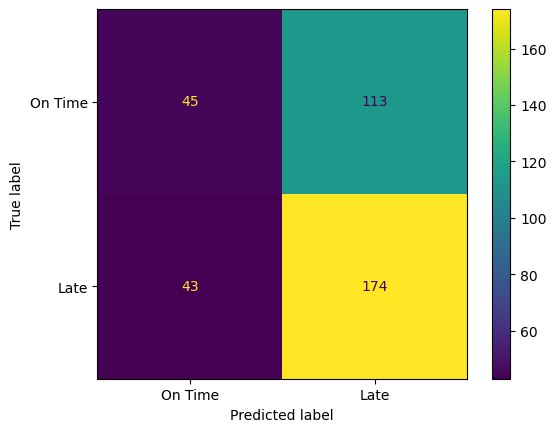

In [230]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm
                              , display_labels = ['On Time', 'Late'])
disp.plot()
plt.show()

In [231]:
# Classification Report: 

print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

        Late       0.51      0.28      0.37       158
     On Time       0.61      0.80      0.69       217

    accuracy                           0.58       375
   macro avg       0.56      0.54      0.53       375
weighted avg       0.57      0.58      0.55       375

